In [23]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd


feature_cols = ["aii", "aug"]
X = df[feature_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results = []

k_values = [2, 3, 4, 5, 6]
n_init_values = [5, 10, 20, 50]

for k in k_values:
    for n_init in n_init_values:
        # you can fix random_state so differences are only from n_init
        kmeans = KMeans(
            n_clusters=k,
            n_init=n_init,
            max_iter=1000,
            random_state=41,
        )
        labels = kmeans.fit_predict(X_scaled)

        inertia = kmeans.inertia_

        # silhouette is undefined for k=1, but we start at k>=2 so it's fine
        sil = silhouette_score(X_scaled, labels)

        results.append({
            "k": k,
            "n_init": n_init,
            "inertia": inertia,
            "silhouette": sil,
        })

results_df = pd.DataFrame(results)
results_df





,k,n_init,inertia,silhouette
0,2,5,698.944792,0.584042
1,2,10,698.944792,0.584042
2,2,20,698.921371,0.581538
3,2,50,698.921371,0.581538
4,3,5,472.130284,0.536880
5,3,10,472.130284,0.536880
6,3,20,472.096516,0.535837
7,3,50,472.096516,0.535837
8,4,5,354.490584,0.543120
9,4,10,354.490584,0.543120


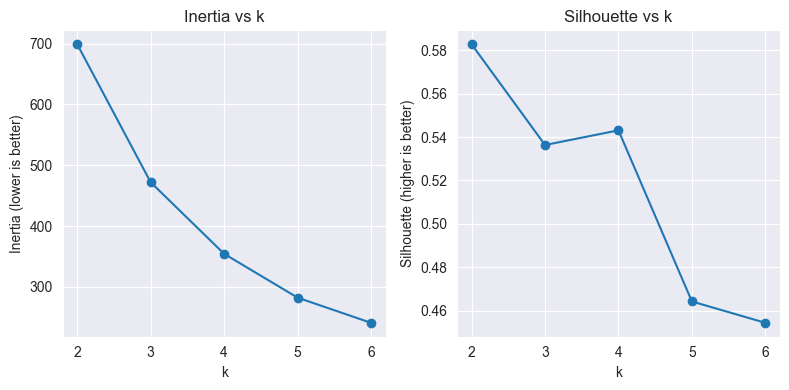

In [25]:
avg_by_k = results_df.groupby("k")[["inertia", "silhouette"]].mean().reset_index()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(avg_by_k["k"], avg_by_k["inertia"], marker="o")
plt.xlabel("k")
plt.ylabel("Inertia (lower is better)")
plt.title("Inertia vs k")

plt.subplot(1, 2, 2)
plt.plot(avg_by_k["k"], avg_by_k["silhouette"], marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette (higher is better)")
plt.title("Silhouette vs k")

plt.tight_layout()
plt.show()


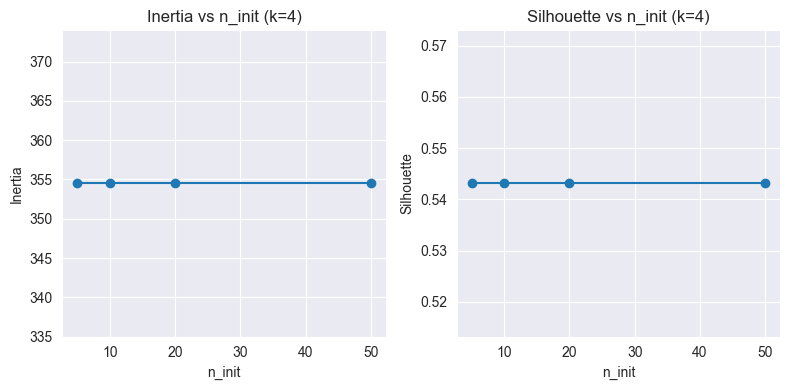

In [26]:
k_target = 4
subset = results_df[results_df["k"] == k_target].copy()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(subset["n_init"], subset["inertia"], marker="o")
plt.xlabel("n_init")
plt.ylabel("Inertia")
plt.title(f"Inertia vs n_init (k={k_target})")

plt.subplot(1, 2, 2)
plt.plot(subset["n_init"], subset["silhouette"], marker="o")
plt.xlabel("n_init")
plt.ylabel("Silhouette")
plt.title(f"Silhouette vs n_init (k={k_target})")

plt.tight_layout()
plt.show()



In [27]:
# Results show that while evaluating k from 2-6, k = 3 and k = 4 are the best fit. k =4 (as expected) is slightly better so this is what we're going for.
# baswed on an elbow in inertia, a relatively high silhouette score,k and the interpretability of four automation-augmentation bubbles

# inertia is identical for n_init = 5, 10, 20, 50, and silhouette is also identical
